# WEEK 4 GRADED ASSIGNMENT

### Import required Libraries

In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import RandomForest Classifier, RandomizedSearchCV, LGBMClassifier and KNN Classifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Import Label encoder, label binarizer and Standard Scaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

## ================================ ##

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Read the Data

In [495]:

df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Shape of Dataframe

In [496]:
df.shape

(891, 12)

### Describe Dataframe

In [497]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for null values

In [498]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Unique Values

In [499]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Drop Nan Values and features

In [500]:
df.drop(columns=['PassengerId','Cabin','Name','Ticket'],inplace=True)
df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


### Label Encoding 

In [501]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


### Split the data into train and test

In [502]:
feature_col = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[feature_col]
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=254)

In [503]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("Y_train:",Y_train.shape) # y_train
print("Y_test:",Y_test.shape) # y_test

X_train: (605, 7)
X_test: (107, 7)
Y_train: (605,)
Y_test: (107,)


## Random Forest  

### HyperTuning with RandomisedSearchCV 

In [504]:
#Create parameter grid
grid = {
    'n_estimators': np.arange(100,200,10), 
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.arange(3, 15, 1), 
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2], 
    'bootstrap': [True,False]
}

I have used randomisedsearchCV and not gridsearchCV as gridsearch has higher chances of overfitting and can compatibility expensive as it check for every parameter while randomisedsearch only check for some parameters.

### Initialize Model

In [505]:
rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator=rf,cv=5,param_distributions=grid,verbose=2,n_jobs=-1)
rf_cv.fit(X_train, Y_train)
rf_best_params = rf_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [506]:
rf = RandomForestClassifier(**rf_best_params)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       n_estimators=170)

### Plot Confusion Matrix

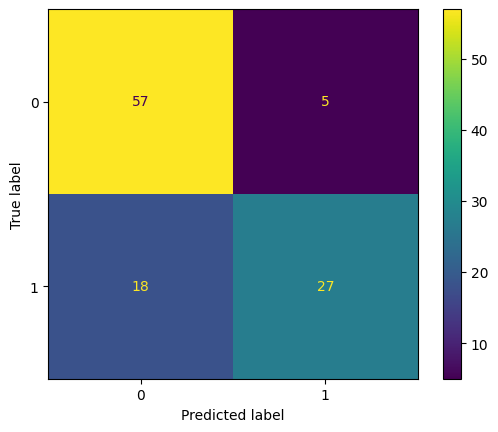

In [507]:
Y_test_predict = rf.predict(X_test)
CM = confusion_matrix(Y_test,Y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

### Classification Report

In [508]:
report = classification_report(Y_test, Y_test_predict, target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.76      0.92      0.83        62
    Survived       0.84      0.60      0.70        45

    accuracy                           0.79       107
   macro avg       0.80      0.76      0.77       107
weighted avg       0.80      0.79      0.78       107



### Accuracy Score

In [509]:
accuracy=accuracy_score(Y_test, Y_test_predict)
print(accuracy)

0.7850467289719626


## LightGBM

### Initialise Model

In [510]:
lgb_model = LGBMClassifier(force_col_wise=True)
lgb_model.fit(X_train,Y_train)
Y_predict = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 243, number of negative: 362
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 605, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401653 -> initscore=-0.398583
[LightGBM] [Info] Start training from score -0.398583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

### Confusion Matrix

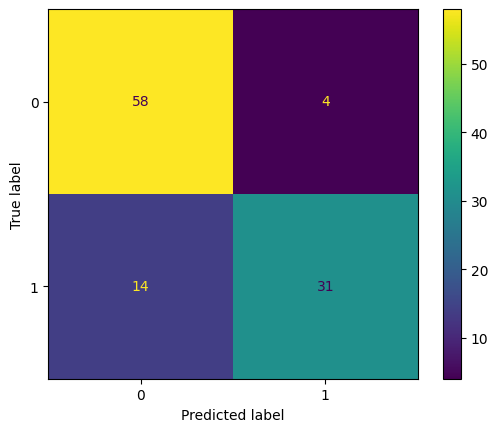

In [511]:
Y_predict = lgb_model.predict(X_test)
CM2 = confusion_matrix(Y_test,Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=lgb_model.classes_)
disp.plot()
plt.show()

### Classification Matrix

In [512]:
report2 = classification_report(Y_test, Y_predict, target_names=['Not Survived', 'Survived'])
print(report2)

              precision    recall  f1-score   support

Not Survived       0.81      0.94      0.87        62
    Survived       0.89      0.69      0.78        45

    accuracy                           0.83       107
   macro avg       0.85      0.81      0.82       107
weighted avg       0.84      0.83      0.83       107



### Accuracy Score

In [513]:
accuracy2=accuracy_score(Y_test, Y_predict)
print(accuracy2)

0.8317757009345794


## KNN

### Standard Scailing

In [514]:
scalar = StandardScaler()
X_train['Age'] = scalar.fit_transform(X_train[['Age']])
X_test['Age'] = scalar.transform(X_test[['Age']])

X_train['Fare'] = scalar.fit_transform(X_train[['Fare']])
X_test['Fare'] = scalar.transform(X_test[['Fare']])


### HyperTuning

In [515]:
# Create Hyperparameter grid
grid3 = {
    'n_neighbors' : np.arange(10,100,10),
    'p' : np.arange(2,80,5)
}

### Initialize Model

In [516]:
knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(estimator=knn,cv=5,param_distributions=grid3,verbose=2,n_jobs=-1)
knn_cv.fit(X_train, Y_train)
knn_best_params = knn_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [517]:
knn = KNeighborsClassifier(**knn_best_params)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10, p=62)

### Plot Confusion Matrix

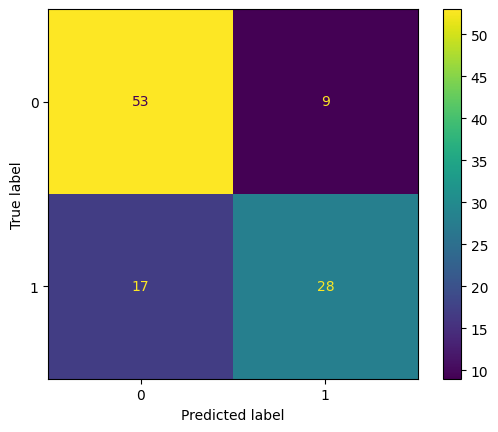

In [518]:
Y_pred = knn.predict(X_test)
CM3 = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=knn.classes_)
disp.plot()
plt.show()

### Classification Report

In [519]:
report3 = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])
print(report3)

              precision    recall  f1-score   support

Not Survived       0.76      0.85      0.80        62
    Survived       0.76      0.62      0.68        45

    accuracy                           0.76       107
   macro avg       0.76      0.74      0.74       107
weighted avg       0.76      0.76      0.75       107



### Accuracy Score

In [520]:
accuracy3=accuracy_score(Y_test, Y_pred)
print(accuracy3)

0.7570093457943925


## Conclusion

### After extensive experimentation and hyperparameter tuning, we concluded that LightGBM performs the best in predicting the survival status of passengers on the Titanic dataset. The LightGBM model achieved an accuracy score of 0.83, outperforming other algorithms considered in this study.

## General Overview of all the models used:
- **LightGBM**: Achieved the highest accuracy and demonstrated strong predictive performance.
- **Random Forest**: Provided robust results with good generalization.
- **k-NN**: Offered baseline performance for comparison.